In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.columns = [c.lower().strip() for c in df.columns]

In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Shape: (891, 12)
Columns: ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("\n--- Numeric summary ---")
print(df.describe().T)

print("\n--- Categorical summary ---")
print(df.select_dtypes(include=['object','category']).describe().T)


--- Numeric summary ---
             count        mean         std   min       25%       50%    75%  \
passengerid  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
sibsp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
passengerid  891.0000  
survived       1.0000  
pclass         3.0000  
age           80.0000  
sibsp          8.0000  
parch          6.0000  
fare         512.3292  

--- Categorical summary ---
         count unique                  top freq
name       891    891  Dooley, Mr. Patrick    1
sex        891      2    

In [7]:
missing = df.isnull().sum().to_frame('missing_count')
missing['missing_percent'] = (missing['missing_count'] / len(df) * 100).round(2)
print("\n--- Missing values ---")
print(missing.sort_values('missing_count', ascending=False))


--- Missing values ---
             missing_count  missing_percent
cabin                  687            77.10
age                    177            19.87
embarked                 2             0.22
passengerid              0             0.00
name                     0             0.00
pclass                   0             0.00
survived                 0             0.00
sex                      0             0.00
parch                    0             0.00
sibsp                    0             0.00
fare                     0             0.00
ticket                   0             0.00


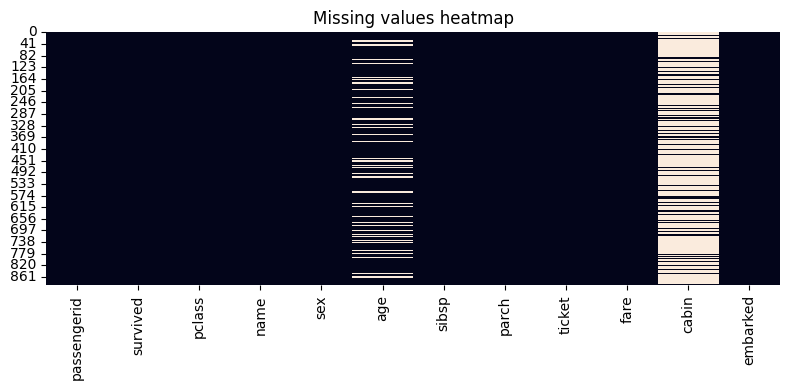

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values heatmap')
plt.tight_layout()
plt.show()


Numeric columns: ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


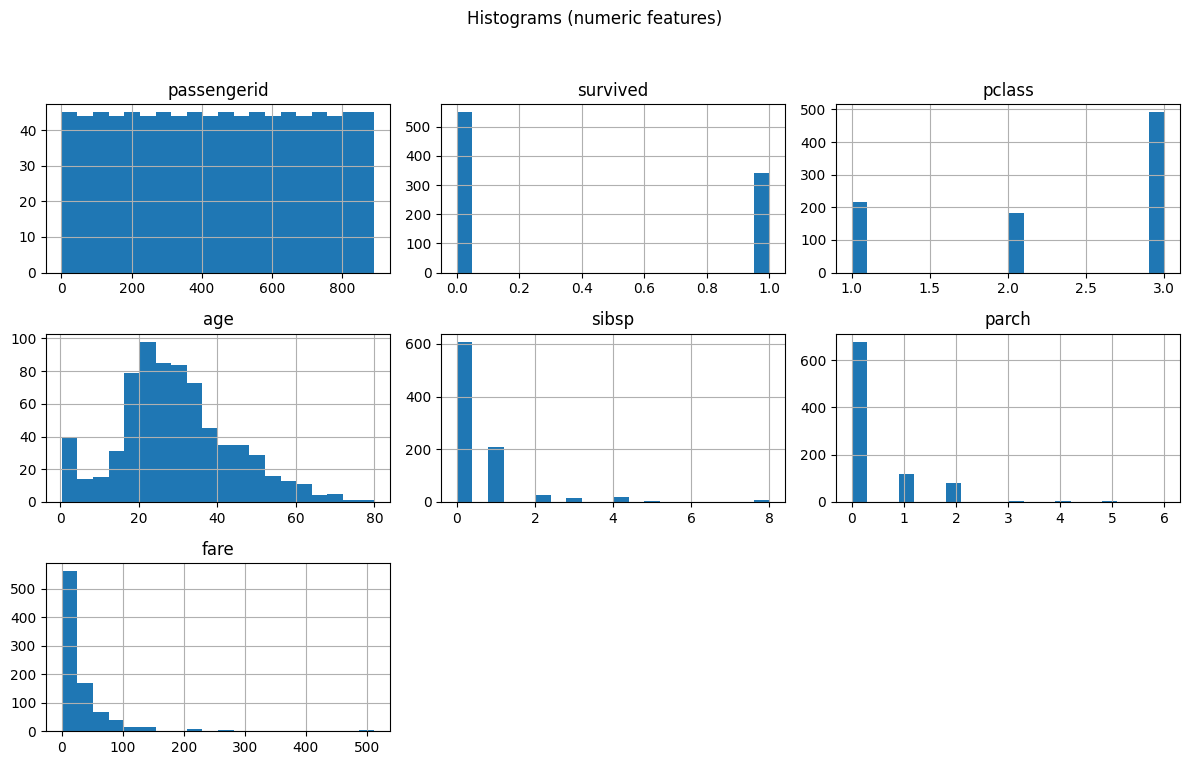

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols)

# Histograms
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms (numeric features)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

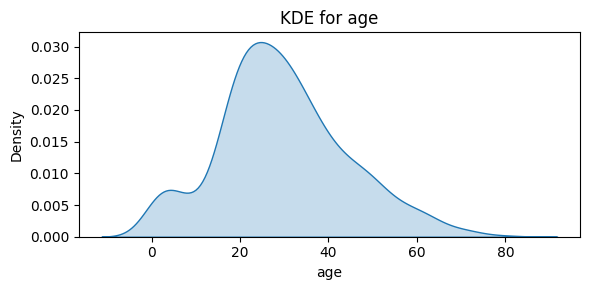

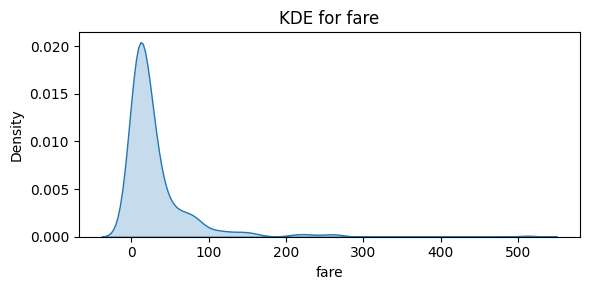

In [10]:
for col in ['age', 'fare']:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.kdeplot(df[col].dropna(), fill=True)
        plt.title(f'KDE for {col}')
        plt.tight_layout()
        plt.show()


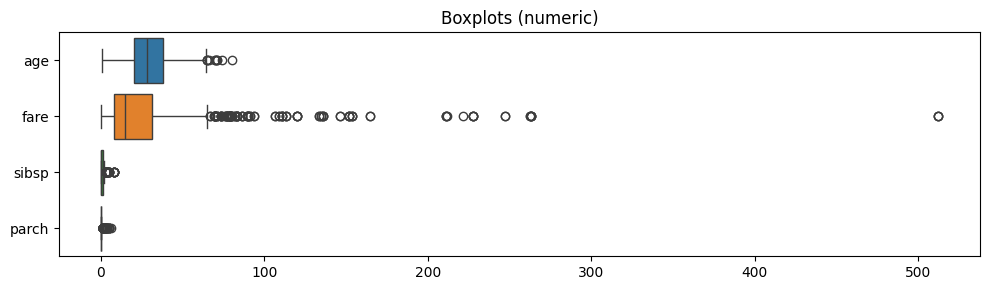

In [11]:
plt.figure(figsize=(10,3))
to_plot = [c for c in ['age', 'fare', 'sibsp', 'parch'] if c in df.columns]
sns.boxplot(data=df[to_plot], orient="h")
plt.title("Boxplots (numeric)")
plt.tight_layout()
plt.show()


--- Correlation matrix ---
             passengerid  survived  pclass    age  sibsp  parch   fare
passengerid        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
sibsp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000


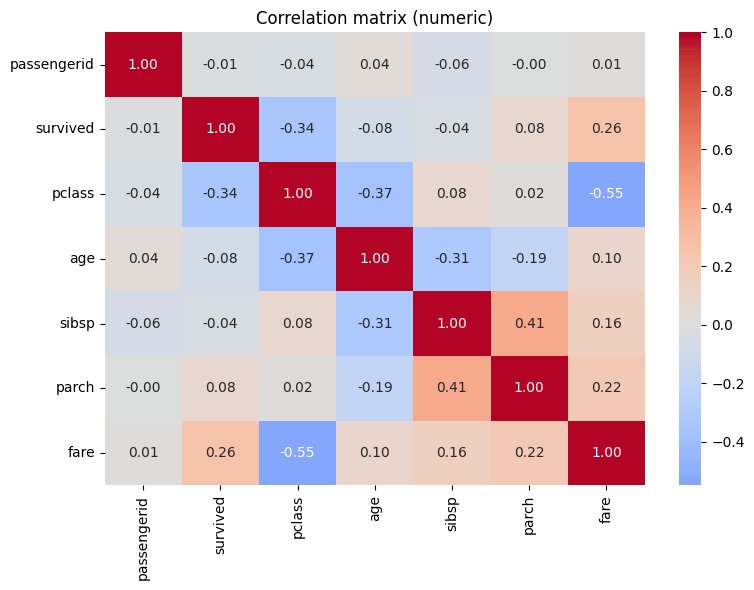

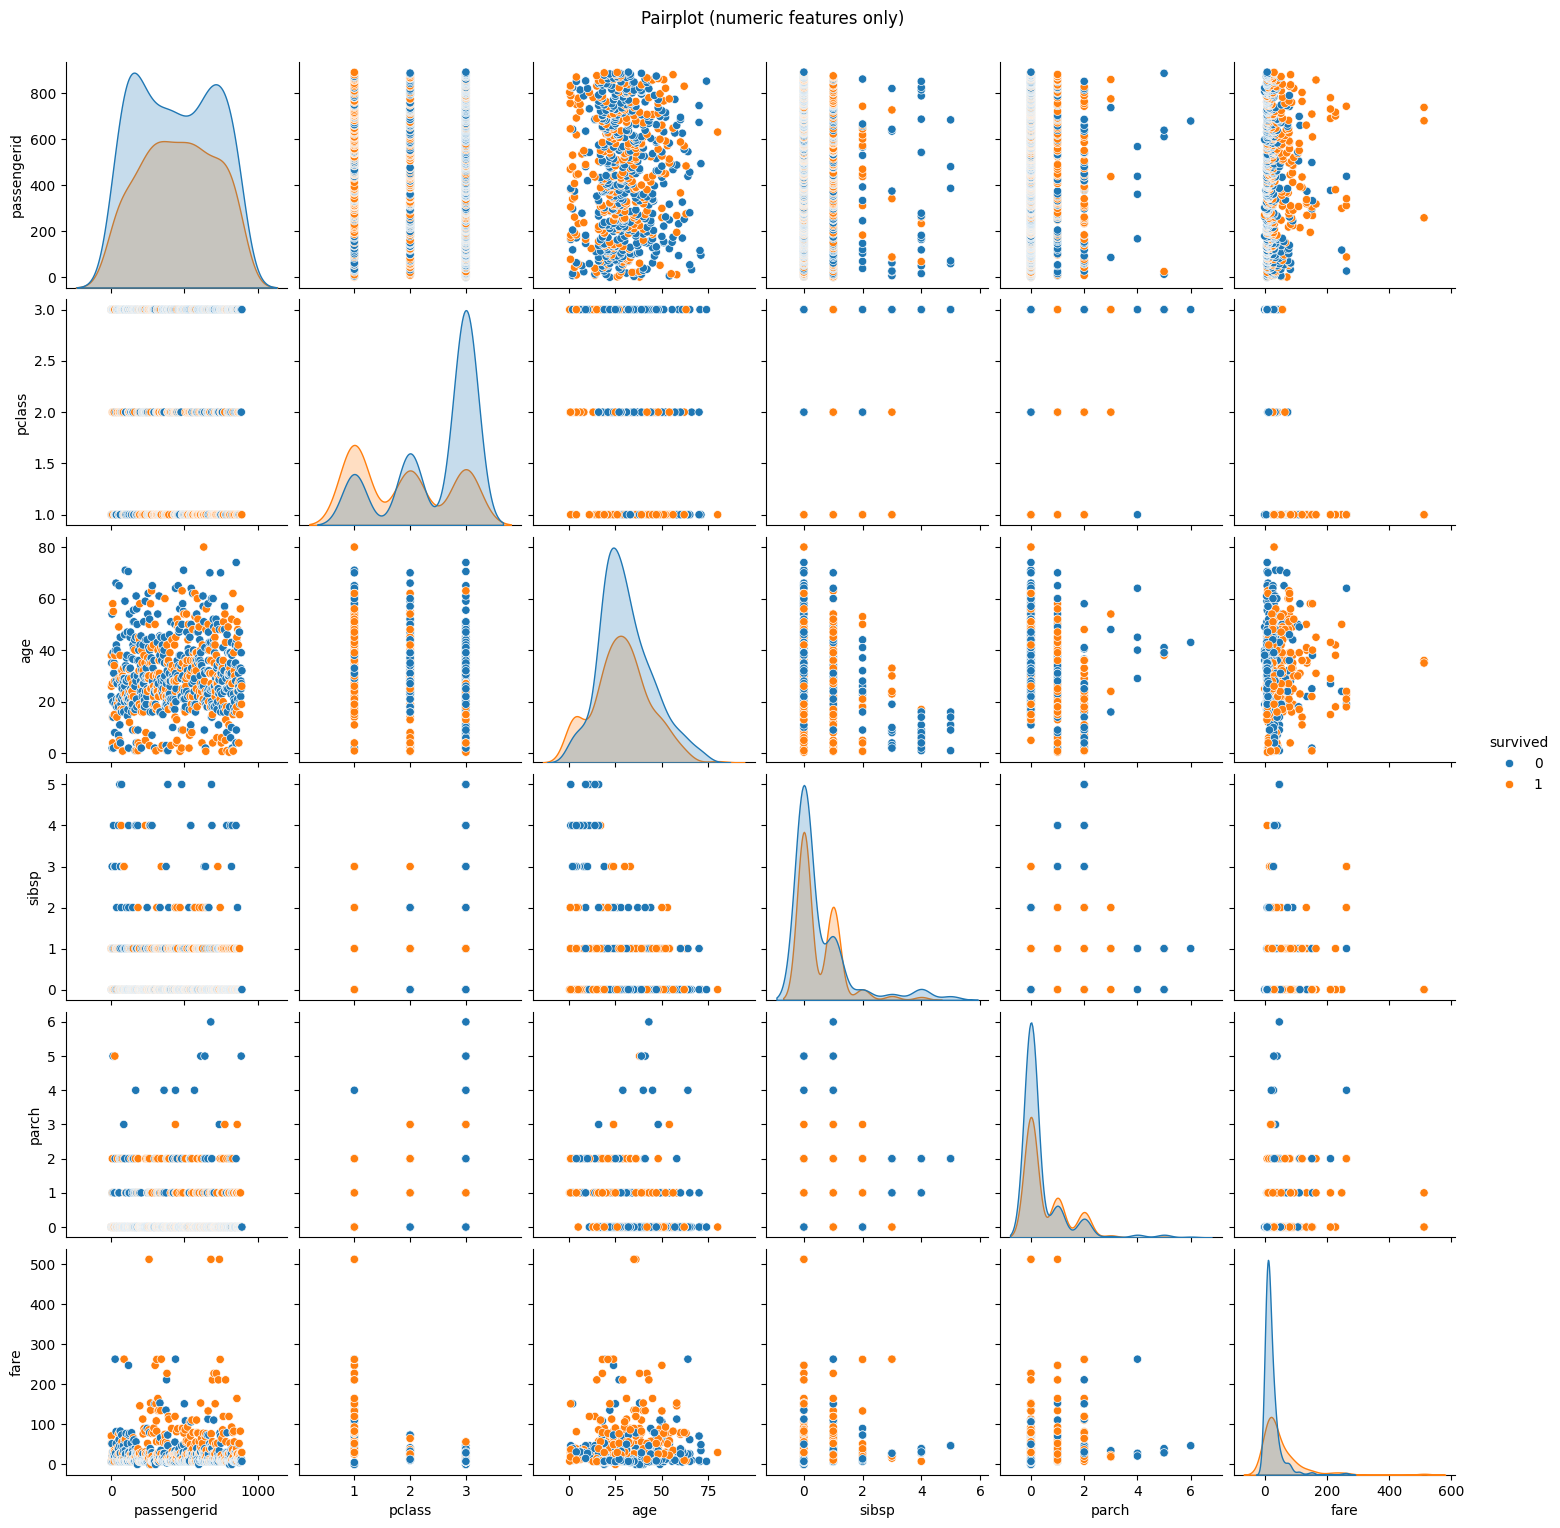

In [13]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    print("\n--- Correlation matrix ---")
    print(corr.round(3))

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation matrix (numeric)")
    plt.tight_layout()
    plt.show()

    # --------------------------
    # Safe Pairplot
    # --------------------------
    # Select strictly numeric columns again
    pairplot_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Add 'survived' if available
    if 'survived' in df.columns and 'survived' not in pairplot_cols:
        pairplot_cols.append('survived')

    # Drop NaN rows only for these columns
    pairplot_data = df[pairplot_cols].dropna()

    # Plot with hue if 'survived' is available
    if 'survived' in pairplot_data.columns:
        sns.pairplot(pairplot_data, hue="survived", diag_kind="kde")
    else:
        sns.pairplot(pairplot_data, diag_kind="kde")

    plt.suptitle("Pairplot (numeric features only)", y=1.02)
    plt.show()



Survival rate by sex:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


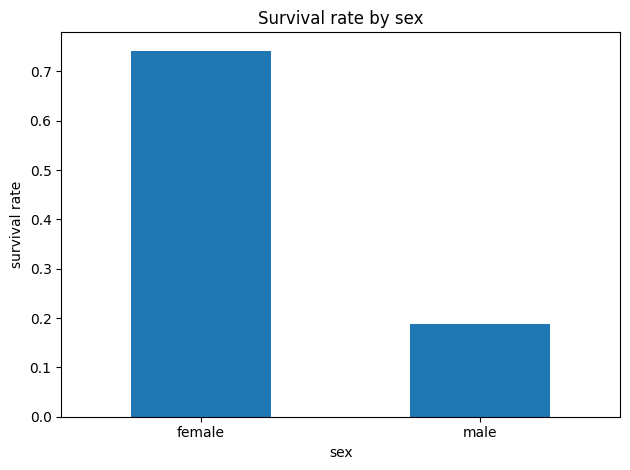

In [14]:
if set(['sex','survived']).issubset(df.columns):
    surv_by_sex = df.groupby('sex')['survived'].mean().sort_values(ascending=False)
    print("\nSurvival rate by sex:\n", surv_by_sex)
    surv_by_sex.plot(kind='bar', rot=0)
    plt.ylabel('survival rate')
    plt.title('Survival rate by sex')
    plt.tight_layout()
    plt.show()


Survival rate by pclass:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


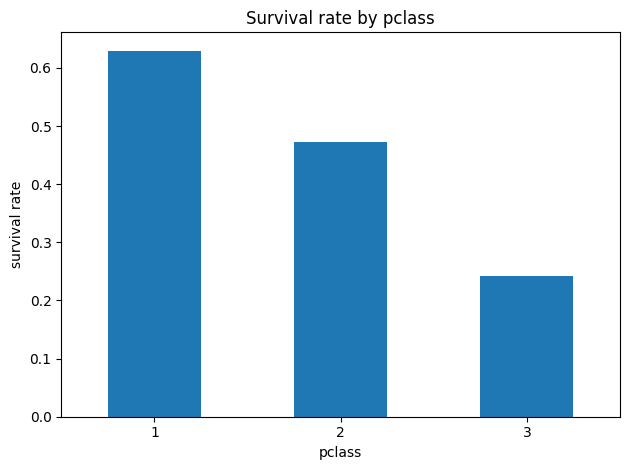

In [15]:
if set(['pclass','survived']).issubset(df.columns):
    surv_by_pclass = df.groupby('pclass')['survived'].mean().sort_index()
    print("\nSurvival rate by pclass:\n", surv_by_pclass)
    surv_by_pclass.plot(kind='bar', rot=0)
    plt.xlabel('pclass')
    plt.ylabel('survival rate')
    plt.title('Survival rate by pclass')
    plt.tight_layout()
    plt.show()


Survival pivot (pclass x sex):
 sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


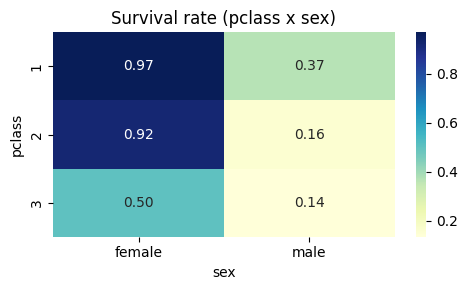

In [16]:
if set(['pclass','sex','survived']).issubset(df.columns):
    pivot = df.pivot_table(index='pclass', columns='sex', values='survived', aggfunc='mean')
    print("\nSurvival pivot (pclass x sex):\n", pivot)
    plt.figure(figsize=(5,3))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title('Survival rate (pclass x sex)')
    plt.tight_layout()
    plt.show()

In [18]:
print("\nMissing-value handling suggestions:")
for col, row in missing.iterrows():
    pct = row['missing_percent']
    if pct == 0:
        continue
    suggestion = "drop/inspect"
    if col in ['age']:
        suggestion = "impute (median/age-bins)"
    elif col in ['fare']:
        suggestion = "impute (median)"
    elif col in ['embarked']:
        suggestion = "impute (mode) or treat as 'Unknown'"
    elif pct > 50:
        suggestion = "consider dropping or engineering 'missing' indicator"
    print(f"- {col}: {row['missing_count']} missing ({pct}%) -> suggestion: {suggestion}")



Missing-value handling suggestions:
- age: 177.0 missing (19.87%) -> suggestion: impute (median/age-bins)
- cabin: 687.0 missing (77.1%) -> suggestion: consider dropping or engineering 'missing' indicator
- embarked: 2.0 missing (0.22%) -> suggestion: impute (mode) or treat as 'Unknown'


In [21]:
print("\nFeature engineering ideas (examples):")
ideas = [
    "Extract title from name -> map to categories (Mr, Mrs, Miss, Master, Rare)",
    "Create age bins (child/young/adult/senior)",
    "Create family_size = sibsp + parch + 1",
    "Create fare per person = fare / family_size",
    "Flag for missing age (age_missing)",
    "Encode categorical variables (one-hot or ordinal as needed)"
]
for i in ideas:
    print("-", i)


Feature engineering ideas (examples):
- Extract title from name -> map to categories (Mr, Mrs, Miss, Master, Rare)
- Create age bins (child/young/adult/senior)
- Create family_size = sibsp + parch + 1
- Create fare per person = fare / family_size
- Flag for missing age (age_missing)
- Encode categorical variables (one-hot or ordinal as needed)


In [23]:
if 'survived' in df.columns:
    print("\nOverall survival rate: {:.2f}".format(df['survived'].mean()))
    if 'sex' in df.columns:
        print("Survival rate by sex:\n", df.groupby('sex')['survived'].mean())
    if 'pclass' in df.columns:
        print("Survival rate by pclass:\n", df.groupby('pclass')['survived'].mean())




Overall survival rate: 0.38
Survival rate by sex:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Survival rate by pclass:
 pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64
